In [1]:
import nbimporter
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
from allocation_strategy import RandomGuestAllocation, OrderGustAllocation, PriceHotelAllocation, AvailabilityHotelAllocation
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick

In [2]:
df_guests = pd.read_csv("guests.csv")
df_hotels = pd.read_csv("hotels.csv")
df_prefs = pd.read_csv("preferences.csv")

# 1) Statistics

## 1.1) No assign_all

In [3]:
a = RandomGuestAllocation(df_guests, df_hotels, df_prefs)
a.assign()
print("----Random Association-Completely Random---")
print(a, end='\n\n')

a1 = RandomGuestAllocation(df_guests, df_hotels, df_prefs,random_on='guest')
a1.assign()
print("----Random Association1-random_on=guest---")
print(a1, end='\n\n')

a2 = RandomGuestAllocation(df_guests, df_hotels, df_prefs,random_on='guest_priority')
a2.assign()
print("----Random Association2-random_on=guest_priority---")
print(a2, end='\n\n')


b = OrderGustAllocation(df_guests, df_hotels, df_prefs)
b.assign()
b._partial_hotel_booking_ratio()
print("----Association by booking order----")
print(b, end='\n\n')

c = PriceHotelAllocation(df_guests, df_hotels, df_prefs)
c.assign()
c._partial_hotel_booking_ratio()
print("----Association by hotel price----")
print(c, end='\n\n')

d = AvailabilityHotelAllocation(df_guests, df_hotels, df_prefs)
d.assign()
d._partial_hotel_booking_ratio()
print("----Association by hotel rooms availability----")
print(d)



----Random Association-Completely Random---
Total business volume: 641,384.33 €
Assigned guests: 4000
Vacant rooms: 617
Number of fully booked hotels: 256
Number of completely vacant hotels: 0
Number of neither full nor vacant hotels: 144
Overall satisfaction is: 3.11%

----Random Association1-random_on=guest---
Total business volume: 641,040.86 €
Assigned guests: 3979
Vacant rooms: 638
Number of fully booked hotels: 255
Number of completely vacant hotels: 0
Number of neither full nor vacant hotels: 145
Overall satisfaction is: 97.47%

----Random Association2-random_on=guest_priority---
Total business volume: 638,833.46 €
Assigned guests: 3981
Vacant rooms: 636
Number of fully booked hotels: 261
Number of completely vacant hotels: 0
Number of neither full nor vacant hotels: 139
Overall satisfaction is: 53.82%

----Association by booking order----
Total business volume: 643,597.53 €
Assigned guests: 3975
Vacant rooms: 642
Number of fully booked hotels: 255
Number of completely vacant ho

## 1.2) Assign all

In [4]:
a_aa = RandomGuestAllocation(df_guests, df_hotels, df_prefs,assign_all = True)
a_aa.assign()
print("----Random Association-Completely Random---")
print(a_aa, end='\n\n')

a1_aa = RandomGuestAllocation(df_guests, df_hotels, df_prefs,assign_all = True,random_on='guest')
a1_aa.assign()
print("----Random Association1-Assign_all_ON-random_on=guest---")
print(a1_aa, end='\n\n')

a2_aa = RandomGuestAllocation(df_guests, df_hotels, df_prefs,assign_all = True,random_on='guest_priority')
a2_aa.assign()
print("----Random Association2-Assign_all_ON-random_on=guest_priority---")
print(a2_aa, end='\n\n')


b_aa = OrderGustAllocation(df_guests, df_hotels, df_prefs,assign_all = True)
b_aa.assign()
print("----Association by booking order-Assign_all_ON----")
print(b_aa, end='\n\n')

c_aa = PriceHotelAllocation(df_guests, df_hotels, df_prefs,assign_all = True)
c_aa.assign()
print("----Association by hotel price-Assign_all_ON----")
print(c_aa, end='\n\n')

d_aa = AvailabilityHotelAllocation(df_guests, df_hotels, df_prefs,assign_all = True)
d_aa.assign()
print("----Association by hotel rooms availability-Assign_all_ON----")
print(d_aa)

----Random Association-Completely Random---
Total business volume: 648,417.1 €
Assigned guests: 4000
Vacant rooms: 617
Number of fully booked hotels: 254
Number of completely vacant hotels: 0
Number of neither full nor vacant hotels: 146
Overall satisfaction is: 3.06%

----Random Association1-Assign_all_ON-random_on=guest---
Total business volume: 643,580.59 €
Assigned guests: 4000
Vacant rooms: 617
Number of fully booked hotels: 258
Number of completely vacant hotels: 0
Number of neither full nor vacant hotels: 142
Overall satisfaction is: 97.3%

----Random Association2-Assign_all_ON-random_on=guest_priority---
Total business volume: 640,575.01 €
Assigned guests: 4000
Vacant rooms: 617
Number of fully booked hotels: 259
Number of completely vacant hotels: 0
Number of neither full nor vacant hotels: 141
Overall satisfaction is: 54.12%

----Association by booking order-Assign_all_ON----
Total business volume: 647,781.96 €
Assigned guests: 4000
Vacant rooms: 617
Number of fully booked ho

# 2) Plots

## 2.1) Initializations

In [5]:
sl, sl1, sl2, sl_aa, sl1_aa, sl2_aa = ([] for i in range(6))
bv, bv1, bv2, bv_aa, bv1_aa, bv2_aa = ([] for i in range(6))
ag, ag1, ag2, ag_aa, ag1_aa, ag2_aa = ([] for i in range(6))
fh, fh1, fh2, fh_aa, fh1_aa, fh2_aa = ([] for i in range(6))
eh, eh1, eh2, eh_aa, eh1_aa, eh2_aa = ([] for i in range(6))
neh, neh1, neh2, neh_aa, neh1_aa, neh2_aa = ([] for i in range(6))

In [6]:
for i in tqdm(range(100)):
    a = RandomGuestAllocation(df_guests, df_hotels, df_prefs, random_on=None)
    a.assign()
    a1 = RandomGuestAllocation(df_guests, df_hotels, df_prefs, random_on='guest')
    a1.assign()
    a2 = RandomGuestAllocation(df_guests, df_hotels, df_prefs, random_on='guest_priority')
    a2.assign()
    a_aa = RandomGuestAllocation(df_guests, df_hotels, df_prefs, assign_all=True, random_on=None)
    a_aa.assign()
    a1_aa = RandomGuestAllocation(df_guests, df_hotels, df_prefs,assign_all=True, random_on='guest')
    a1_aa.assign()
    a2_aa = RandomGuestAllocation(df_guests, df_hotels, df_prefs,assign_all=True, random_on='guest_priority')
    a2_aa.assign()
    sl.append(a.satifaction_level)
    bv.append(a.business_volume)
    sl1.append(a1.satifaction_level)
    bv1.append(a1.business_volume)
    sl2.append(a2.satifaction_level)
    bv2.append(a2.business_volume)
    sl_aa.append(a_aa.satifaction_level)
    sl1_aa.append(a1_aa.satifaction_level)
    sl2_aa.append(a2_aa.satifaction_level)
    bv_aa.append(a_aa.business_volume)
    bv1_aa.append(a1_aa.business_volume)
    bv2_aa.append(a2_aa.business_volume)
    ag.append(a.number_ass_guest)
    ag1.append(a1.number_ass_guest)
    ag2.append(a2.number_ass_guest)
    ag_aa.append(a_aa.number_ass_guest)
    ag1_aa.append(a1_aa.number_ass_guest)
    ag2_aa.append(a2_aa.number_ass_guest)
    fh.append(a.number_fully_book_hotels)
    fh1.append(a1.number_fully_book_hotels)
    fh2.append(a2.number_fully_book_hotels)
    fh_aa.append(a_aa.number_fully_book_hotels)
    fh1_aa.append(a1_aa.number_fully_book_hotels)
    fh2_aa.append(a2_aa.number_fully_book_hotels)
    eh.append(a.number_empty_hotels)
    eh1.append(a1.number_empty_hotels)
    eh2.append(a2.number_empty_hotels)
    eh_aa.append(a_aa.number_empty_hotels)
    eh1_aa.append(a1_aa.number_empty_hotels)
    eh2_aa.append(a2_aa.number_empty_hotels)
    neh.append(a.number_not_full_empty_hotel)
    neh1.append(a1.number_not_full_empty_hotel)
    neh2.append(a2.number_not_full_empty_hotel)
    neh_aa.append(a_aa.number_not_full_empty_hotel)
    neh1_aa.append(a1_aa.number_not_full_empty_hotel)
    neh2_aa.append(a2_aa.number_not_full_empty_hotel)

  0%|          | 0/100 [00:00<?, ?it/s]

## 2.2) Summary table

In [7]:
business_volume_list = [round(sum(bv)/len(bv),-2)/1000, round(sum(bv1)/len(bv1),-2)/1000, round(sum(bv2)/len(bv2),-2)/1000,
                        round(b.business_volume,-2)/1000, round(c.business_volume,-2)/1000, round(d.business_volume,-2)/1000]

satisfaction_level_list = [round(sum(sl)/len(sl)*100,2), round(sum(sl1)/len(sl1)*100,2), round(sum(sl2)/len(sl2)*100,2),
                           round(b.satifaction_level*100,2), round(c.satifaction_level*100,2), round(d.satifaction_level*100,2)]

assigned_guest_list = [round(sum(ag)/len(ag)), round(sum(ag1)/len(ag1)), 
                       round(sum(ag2)/len(ag2)),int(b.number_ass_guest), int(c. number_ass_guest), int(d.number_ass_guest)]
                                                 
full_hotels_list = [round(sum(fh)/len(fh)), round(sum(fh1)/len(fh1)), 
                       round(sum(fh2)/len(fh2)),b.number_fully_book_hotels,c.number_fully_book_hotels,d.number_fully_book_hotels]

empty_hotels_list = [round(sum(eh)/len(eh)), round(sum(eh1)/len(eh1)), 
                       round(sum(eh2)/len(eh2)), b.number_empty_hotels, c.number_empty_hotels, d.number_empty_hotels]

part_empty_hotels_list = [round(sum(neh)/len(neh)), round(sum(neh1)/len(neh1)), 
                       round(sum(neh2)/len(neh2)), b.number_not_full_empty_hotel, c.number_not_full_empty_hotel,
                         d.number_not_full_empty_hotel]

stat_summary = pd.DataFrame([business_volume_list, satisfaction_level_list, assigned_guest_list,
                            full_hotels_list, 
                             empty_hotels_list,
                             part_empty_hotels_list]).transpose().rename(
    columns={0:'Business volume [k Euro]',1:'Satisfaction Level [%]',
             2:'Assigned guests',3: 'Full Hotels',4:'Empty Hotels',5:'Not full nor empty'}, index={0:'Completely Random (avg)',1:'Random on guest (avg)',2:'Random on guest priority (avg)',3:'Booking order',
             4:'Hotel price',5: 'Hotel availability'})

stat_summary = stat_summary.rename_axis('Strategy', axis='columns')
stat_summary

import dataframe_image as dfi

dfi.export(stat_summary, 'pics/Results_table.png')

In [8]:
stat_summary['Full Hotels'] = stat_summary['Full Hotels'].astype(int)
stat_summary['Assigned guests'] = stat_summary['Assigned guests'].astype(int)
stat_summary['Empty Hotels'] = stat_summary['Empty Hotels'].astype(int)
stat_summary['Not full nor empty'] = stat_summary['Not full nor empty'].astype(int)
stat_summary

Strategy,Business volume [k Euro],Satisfaction Level [%],Assigned guests,Full Hotels,Empty Hotels,Not full nor empty
Completely Random (avg),641.8,3.14,4000,256,0,144
Random on guest (avg),642.3,97.35,3974,257,0,143
Random on guest priority (avg),637.0,54.06,3973,252,0,148
Booking order,643.6,97.49,3975,255,0,145
Hotel price,564.3,53.57,3926,321,12,67
Hotel availability,629.6,52.84,3955,268,41,91


In [9]:
stat_summary.max()

Strategy
Business volume [k Euro]     643.60
Satisfaction Level [%]        97.49
Assigned guests             4000.00
Full Hotels                  321.00
Empty Hotels                  41.00
Not full nor empty           148.00
dtype: float64

## 2.3) Assigned guests

<ipython-input-10-64f5928e49f5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right')


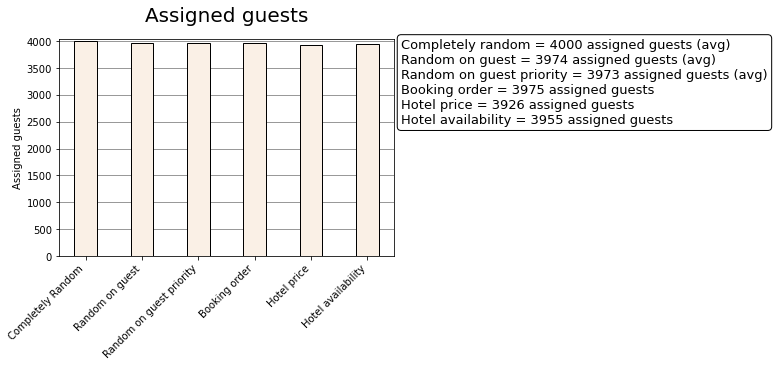

In [10]:
fig, ax2 = plt.subplots()
values = assigned_guest_list
strategy = ['Completely Random','Random on guest','Random on guest priority', 'Booking order', 'Hotel price', 'Hotel availability']
ax2.bar(strategy, values, color ='linen',ec = 'black',
       width = 0.4)
ax2.set_xticklabels(strategy,rotation=45,ha='right')
ax2.set_ylabel('Assigned guests')
ax2.set_ylim(0,4050)
ax2.set_title('Assigned guests',fontsize=20,y=1.05)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='solid')
plt.text(5.6, 4050, 'Completely random = %s'%(assigned_guest_list[0])+' assigned guests (avg)' +
         '\nRandom on guest = %s'%(assigned_guest_list[1]) +' assigned guests (avg)'
         '\nRandom on guest priority = %s'%(assigned_guest_list[2]) +' assigned guests (avg)'
         '\nBooking order = %s'%(assigned_guest_list[3]) +' assigned guests'
         '\nHotel price = %s'%(assigned_guest_list[4]) +' assigned guests'
         '\nHotel availability = %s'%(assigned_guest_list[5]) +' assigned guests', size=13, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="white"))
plt.show()
fig.savefig('pics/ass_guests.png',bbox_inches='tight') 

## 2.4)Hotel booking distribution 

<ipython-input-11-22d572eb1ddd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right', fontsize=12)


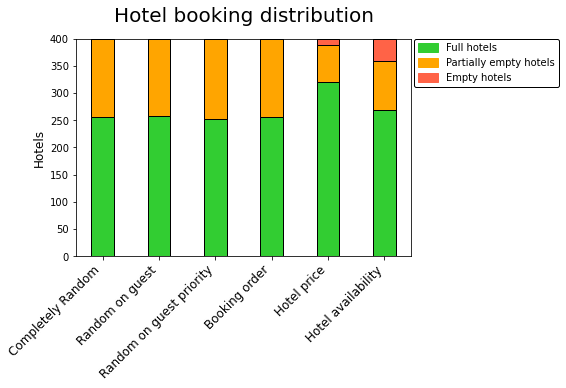

In [11]:
fig, ax2 = plt.subplots()
values= full_hotels_list
values1 = empty_hotels_list
values2 = part_empty_hotels_list
strategy = ['Completely Random','Random on guest','Random on guest priority', 'Booking order', 'Hotel price', 'Hotel availability']
ax2.bar(strategy, values, color ='limegreen',ec = 'black',
       width = 0.4)
ax2.bar(strategy,values2, bottom = values, color ='orange',ec = 'black',
       width = 0.4)
ax2.bar(strategy, values1, bottom=[i+j for i,j in zip(values, values2)],color ='tomato',ec = 'black',
       width = 0.4)
ax2.set_xticklabels(strategy,rotation=45,ha='right', fontsize=12)
ax2.set_ylabel('Hotels', fontsize=12)
ax2.set_ylim(0,400)
ax2.set_title('Hotel booking distribution' ,fontsize=20,y=1.05)
colors = {'Full hotels':'limegreen', 'Partially empty hotels':'orange', 'Empty hotels':'tomato'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='upper left',handleheight = 1, fontsize =10,
         bbox_to_anchor=(1.01,1), borderaxespad=0.0,edgecolor = 'black', facecolor = 'white',framealpha=1)
fig.savefig('pics/Hotel_booking_distribution.png',bbox_inches='tight') 




##  2.5) Description of partially booked hotels for different strategies  

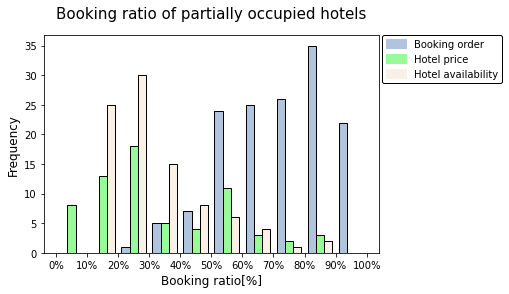

In [12]:
fig, ax = plt.subplots() #ax1,ax2 refer to your two pies
x = np.arange(0,1.1,0.1)
ax.hist([b.partially_vacant_hotels,
         c.partially_vacant_hotels,
         d.partially_vacant_hotels],bins = x,rwidth=0.8,color=['lightsteelblue','palegreen','linen'],ec='black')
#ax.hist(partially_vacant_hotels_c,bins = x,rwidth=0.2, color='red',ec = 'black')
#ax.hist(partially_vacant_hotels_d,bins = x,rwidth=0.2, color='blue',ec = 'black')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_ticks(x)
#ax.set_ylim([0,max(y)+1])
plt.title('Booking ratio of partially occupied hotels',fontsize=15,y=1.05)
ax.set_ylabel('Frequency',fontsize=12)
ax.set_xlabel('Booking ratio[%]',fontsize=12)
plt.xticks(x)
colors = {'Booking order':'lightsteelblue', 'Hotel price':'palegreen','Hotel availability':'linen'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels, loc='upper left',handleheight = 1, fontsize = 10,
         bbox_to_anchor=(1.01,1), borderaxespad=0.0,edgecolor = 'black', facecolor = 'white',framealpha=1)
plt.show()
fig.savefig('pics/partial_hotels.png',bbox_inches='tight') 

### Hotel booking distribution + Assigned guests

<ipython-input-13-6c0881909e62>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right', fontsize=12)
<ipython-input-13-6c0881909e62>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(strategy_,rotation=45,ha='right', fontsize=15)


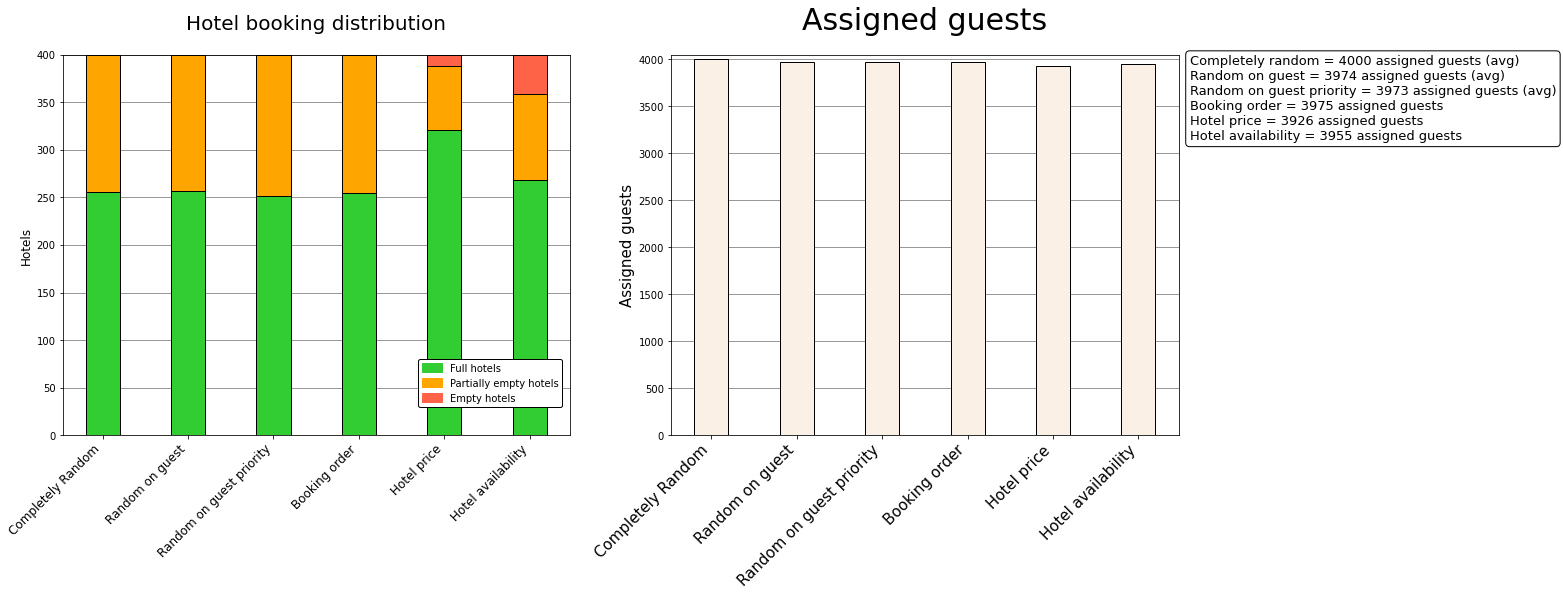

In [13]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(20,7))
values= full_hotels_list
values1 = empty_hotels_list
values2 = part_empty_hotels_list
strategy = ['Completely Random','Random on guest','Random on guest priority', 'Booking order', 'Hotel price', 'Hotel availability']
ax2.bar(strategy, values, color ='limegreen',ec = 'black',
       width = 0.4)
ax2.bar(strategy,values2, bottom = values, color ='orange',ec = 'black',
       width = 0.4)
ax2.bar(strategy, values1, bottom=[i+j for i,j in zip(values, values2)],color ='tomato',ec = 'black',
       width = 0.4)
ax2.set_xticklabels(strategy,rotation=45,ha='right', fontsize=12)
ax2.set_ylabel('Hotels', fontsize=12)
ax2.set_ylim(0,400)
ax2.set_title('Hotel booking distribution' ,fontsize=20,y=1.05)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='solid')
colors = {'Full hotels':'limegreen', 'Partially empty hotels':'orange', 'Empty hotels':'tomato'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='upper left',handleheight = 1, fontsize =10,
         bbox_to_anchor=(0.7,0.2), borderaxespad=0.0,edgecolor = 'black', facecolor = 'white',framealpha=1)

values_ = assigned_guest_list
strategy_ = ['Completely Random','Random on guest','Random on guest priority', 'Booking order', 'Hotel price', 'Hotel availability']
ax1.bar(strategy_, values_, color ='linen',ec = 'black',
       width = 0.4)
ax1.set_xticklabels(strategy_,rotation=45,ha='right', fontsize=15)
ax1.set_ylabel('Assigned guests', fontsize=15)
ax1.set_ylim(0,4050)
ax1.set_title('Assigned guests',fontsize=30,y=1.05)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')
ax1.text(5.6, 4050, 'Completely random = %s'%(assigned_guest_list[0])+' assigned guests (avg)' +
         '\nRandom on guest = %s'%(assigned_guest_list[1]) +' assigned guests (avg)'
         '\nRandom on guest priority = %s'%(assigned_guest_list[2]) +' assigned guests (avg)'
         '\nBooking order = %s'%(assigned_guest_list[3]) +' assigned guests'
         '\nHotel price = %s'%(assigned_guest_list[4]) +' assigned guests'
         '\nHotel availability = %s'%(assigned_guest_list[5]) +' assigned guests', size=13, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="white"))
fig.savefig('pics/Hotel_booking_distribution_&_ass_guests.png',bbox_inches='tight') 


### Hotel booking distribution + Partially empty hotels

<ipython-input-14-54c5a768917e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right', fontsize=12)


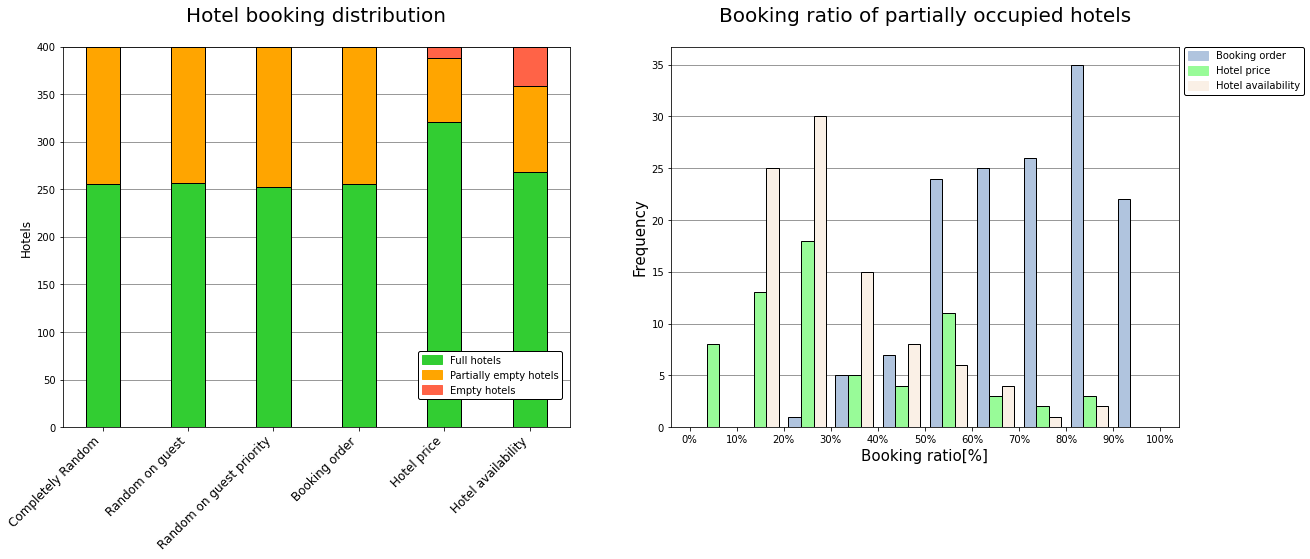

In [14]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(20,7))
values= full_hotels_list
values1 = empty_hotels_list
values2 = part_empty_hotels_list
strategy = ['Completely Random','Random on guest','Random on guest priority', 'Booking order', 'Hotel price', 'Hotel availability']
ax2.bar(strategy, values, color ='limegreen',ec = 'black',
       width = 0.4)
ax2.bar(strategy,values2, bottom = values, color ='orange',ec = 'black',
       width = 0.4)
ax2.bar(strategy, values1, bottom=[i+j for i,j in zip(values, values2)],color ='tomato',ec = 'black',
       width = 0.4)
ax2.set_xticklabels(strategy,rotation=45,ha='right', fontsize=12)
ax2.set_ylabel('Hotels', fontsize=12)
ax2.set_ylim(0,400)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='solid')
ax2.set_title('Hotel booking distribution' ,fontsize=20,y=1.05)
colors = {'Full hotels':'limegreen', 'Partially empty hotels':'orange', 'Empty hotels':'tomato'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='upper left',handleheight = 1, fontsize =10,
         bbox_to_anchor=(0.7,0.2), borderaxespad=0.0,edgecolor = 'black', facecolor = 'white',framealpha=1)

x = np.arange(0,1.1,0.1)
ax1.hist([b.partially_vacant_hotels,
         c.partially_vacant_hotels,
         d.partially_vacant_hotels],bins = x,rwidth=0.8,color=['lightsteelblue','palegreen','linen'],ec='black')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.xaxis.set_ticks(x)
#ax.set_ylim([0,max(y)+1])
ax1.set_title('Booking ratio of partially occupied hotels',fontsize=20,y=1.05)
ax1.set_ylabel('Frequency',fontsize=15)
ax1.set_xlabel('Booking ratio[%]',fontsize=15)
plt.xticks(x)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')
colors = {'Booking order':'lightsteelblue', 'Hotel price':'palegreen','Hotel availability':'linen'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax1.legend(handles, labels, loc='upper left',handleheight = 1, fontsize = 10,
         bbox_to_anchor=(1.01,1), borderaxespad=0.0,edgecolor = 'black', facecolor = 'white',framealpha=1)
plt.show()
fig.savefig('pics/Hotel_booking_distribution_&_partial_hotels.png',bbox_inches='tight') 

## 2.6) Satisfaction level

<ipython-input-15-79d641381eeb>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right')


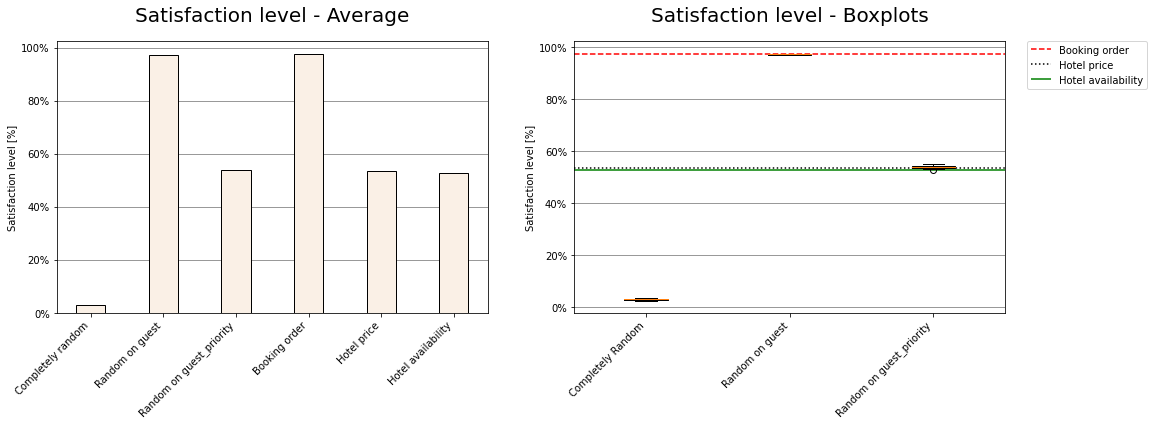

In [15]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(17,5))
ax1.boxplot([sl,sl1,sl2])
ax1.set_ylabel('Satisfaction level [%]')
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(['Completely Random','Random on guest', 'Random on guest_priority'],rotation = 45,ha='right')
left, right = plt.xlim()
ax1.l1 = plt.hlines(b.satifaction_level, xmin=left, xmax=right, colors='red',linestyles='dashed')
ax1.l2 = plt.hlines(c.satifaction_level, xmin=left, xmax=right, colors='black',linestyles='dotted')
ax1.l3 = plt.hlines(d.satifaction_level, xmin=left, xmax=right, colors='green',linestyles='solid')
ax1.legend([ax1.l1,ax1.l2,ax1.l3],['Booking order', 'Hotel price','Hotel availability'],handleheight = 1, fontsize = 10,
         bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.0)
ax1.set_title('Satisfaction level - Boxplots',fontsize=20,y=1.05)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')

sl_average_values = {'Completely random':sum(sl)/len(sl), 
                     'Random on guest':sum(sl1)/len(sl1),
                     'Random on guest_priority':sum(sl2)/len(sl2),
                    'Booking order':b.satifaction_level,'Hotel price':c.satifaction_level,
                    'Hotel availability': d.satifaction_level}

strategy = list(sl_average_values.keys())
values = list(sl_average_values.values())

ax2.bar(strategy, values, color ='linen',ec = 'black',
        width = 0.4)
ax2.set_xticklabels(strategy,rotation=45,ha='right')
ax2.set_ylabel('Satisfaction level [%]')
#ax2.set_ylim(630000,650000)
ax2.set_title('Satisfaction level - Average',fontsize=20,y=1.05)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='solid')

plt.show()
fig.savefig('pics/Satisfaction_level.png',bbox_inches='tight') 

## 2.7) Business volume

<ipython-input-23-49469ed7a5d7>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right')


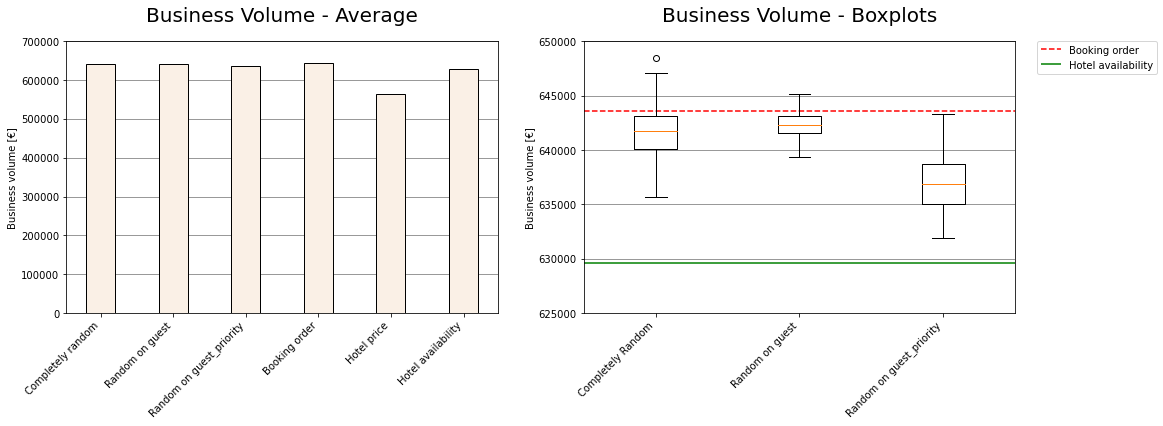

In [23]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(17,5))
ax1.boxplot([bv,bv1,bv2])
ax1.set_ylabel('Business volume [€]')
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(['Completely Random','Random on guest', 'Random on guest_priority'],rotation = 45,ha='right')
left, right = plt.xlim()
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')
ax1.l1 = plt.hlines(b.business_volume, xmin=left, xmax=right, colors='red',linestyles='dashed')
#l2 = plt.hlines(c.business_volume, xmin=left, xmax=right, colors='black',linestyles='dashed')
ax1.l3 = plt.hlines(d.business_volume, xmin=left, xmax=right, colors='green',linestyles='solid')
ax1.legend([ax1.l1, ax1.l3],['Booking order', 'Hotel availability'],handleheight = 1, fontsize = 10,
         bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.0)
ax1.set_title('Business Volume - Boxplots',fontsize=20,y=1.05)
ax1.set_ylim(625000,650000)

bv_average_values = {'Completely random':sum(bv)/len(bv), 
                     'Random on guest':sum(bv1)/len(bv1),
                     'Random on guest_priority':sum(bv2)/len(bv2),
                    'Booking order':b.business_volume,'Hotel price':c.business_volume,
                    'Hotel availability': d.business_volume}

strategy = list(bv_average_values.keys())
values = list(bv_average_values.values())

ax2.bar(strategy, values, color ='linen',ec = 'black',
        width = 0.4)
ax2.set_xticklabels(strategy,rotation=45,ha='right')
ax2.set_ylabel('Business volume [€]')
ax2.set_ylim(0,700000)
ax2.set_title('Business Volume - Average',fontsize=20,y=1.05)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='solid')



plt.show()
fig.savefig('pics/Business_volume.png',bbox_inches='tight') 

### 2.7.1) Business volume (effect of assign_all)

<ipython-input-24-b141e8586bf7>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(strategy,rotation=45,ha='right')


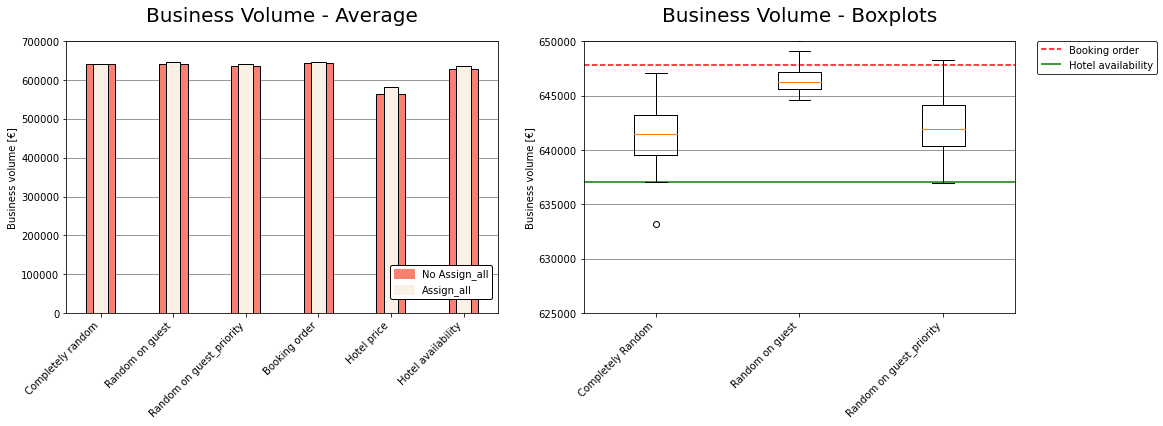

In [24]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(17,5))
ax1.boxplot([bv_aa,bv1_aa,bv2_aa])
ax1.set_ylabel('Business volume [€]')
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(['Completely Random','Random on guest', 'Random on guest_priority'],rotation = 45,ha='right')
left, right = plt.xlim()
ax1.l1 = plt.hlines(b_aa.business_volume, xmin=left, xmax=right, colors='red',linestyles='dashed')
#l2 = plt.hlines(c_aa.business_volume, xmin=left, xmax=right, colors='black',linestyles='dashed')
ax1.l3 = plt.hlines(d_aa.business_volume, xmin=left, xmax=right, colors='green',linestyles='solid')
ax1.legend([ax1.l1,ax1.l3],['Booking order', 'Hotel availability'],handleheight = 1, fontsize = 10,
         bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.0,edgecolor = 'black')
ax1.set_title('Business Volume - Boxplots',fontsize=20,y=1.05)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')
ax1.set_ylim(625000,650000)

bv_average_values = {'Completely random':sum(bv)/len(bv), 
                     'Random on guest':sum(bv1)/len(bv1),
                     'Random on guest_priority':sum(bv2)/len(bv2),
                    'Booking order':b.business_volume,'Hotel price':c.business_volume,
                    'Hotel availability': d.business_volume}

bv_aa_average_values = {'Completely random':sum(bv_aa)/len(bv_aa), 
                     'Random on guest':sum(bv1_aa)/len(bv1_aa),
                     'Random on guest_priority':sum(bv2_aa)/len(bv2_aa),
                    'Booking order':b_aa.business_volume,'Hotel price':c_aa.business_volume,
                    'Hotel availability': d_aa.business_volume}

strategy = list(bv_average_values.keys())
values = list(bv_average_values.values())
values_aa = list(bv_aa_average_values.values())

ax2.bar(strategy, values, color ='salmon',ec = 'black',
       width = 0.4)
ax2.bar(strategy, values_aa, color ='linen',ec = 'black',
        width = 0.2)
ax2.set_xticklabels(strategy,rotation=45,ha='right')
ax2.set_ylabel('Business volume [€]')
ax2.set_ylim(0,700000)
ax2.set_title('Business Volume - Average',fontsize=20,y=1.05)
colors = {'No Assign_all':'salmon', 'Assign_all':'linen'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='lower left',handleheight = 1, fontsize = 10,
         bbox_to_anchor=(0.75, 0.05), borderaxespad=0.0,edgecolor = 'black', facecolor = 'white',framealpha=1)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='solid')


plt.show()
fig.savefig('pics/Business_volume_assign_all.png',bbox_inches='tight') 

## 2.8) Detailed hotel booking distribution for different strategies 

### Association by booking order

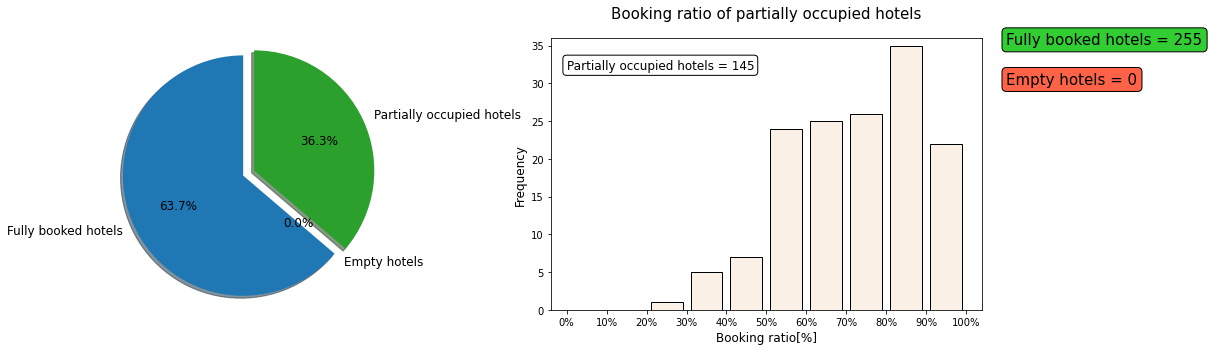

In [18]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(17,5)) #ax1,ax2 refer to your two pies
x = np.arange(0,1.1,0.1)
y,z,_ = ax1.hist(b.partially_vacant_hotels,bins = x,rwidth=0.8,align='mid', color='linen',ec = 'black')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.xaxis.set_ticks(x)
ax1.set_ylim([0,max(y)+1])
plt.text(0, max(y)*0.95, 'Partially occupied hotels = %s'%(b.number_not_full_empty_hotel), size=12, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="white"))
plt.text(1.1, max(y)*1.05, 'Fully booked hotels = %s'%(b.number_fully_book_hotels), size=15, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="limegreen"))
plt.text(1.1, max(y)*0.9, 'Empty hotels = %s'%(b.number_empty_hotels), size=15, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="tomato"))
plt.title('Booking ratio of partially occupied hotels',fontsize=15,y=1.05)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Booking ratio[%]',fontsize=12)

labels = 'Fully booked hotels', 'Empty hotels', 'Partially occupied hotels'
sizes = [b.number_fully_book_hotels, b.number_empty_hotels, len(b.partially_vacant_hotels)]
explode = (0, 0, 0.1)  # only "explode" the 3rd slice.
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig.savefig('pics/Booking_ratio_booking_order.png',bbox_inches='tight') 


### Association by hotel price

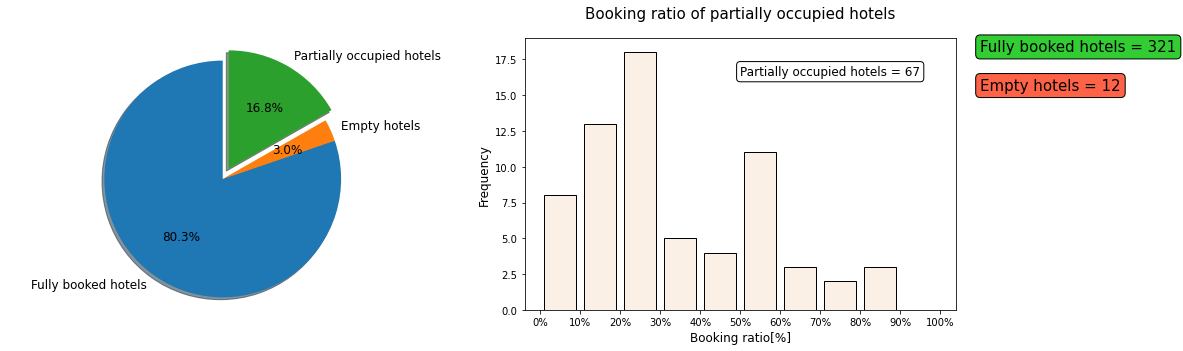

In [19]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(17,5)) #ax1,ax2 refer to your two pies
x = np.arange(0,1.1,0.1)
y,z,_ = ax1.hist(c.partially_vacant_hotels,bins = x,rwidth=0.8,align='mid', color='linen',ec = 'black')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.xaxis.set_ticks(x)
ax1.set_ylim([0,max(y)+1])
plt.text(0.95, max(y)*0.95, 'Partially occupied hotels = %s'%(c.number_not_full_empty_hotel), size=12, rotation=0.,ha="right", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="white"))
plt.text(1.1, max(y)*1.05, 'Fully booked hotels = %s'%(c.number_fully_book_hotels), size=15, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="limegreen"))
plt.text(1.1, max(y)*0.9, 'Empty hotels = %s'%(c.number_empty_hotels), size=15, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="tomato"))
plt.title('Booking ratio of partially occupied hotels',fontsize=15,y=1.05)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Booking ratio[%]',fontsize=12)

labels = 'Fully booked hotels', 'Empty hotels', 'Partially occupied hotels'
sizes = [c.number_fully_book_hotels, c.number_empty_hotels,len(c.partially_vacant_hotels)]
explode = (0, 0, 0.1)  # only "explode" the 3rd slice.
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig.savefig('pics/Booking_ratio_hotel_price.png',bbox_inches='tight') 

### Association by hotel rooms availabilty

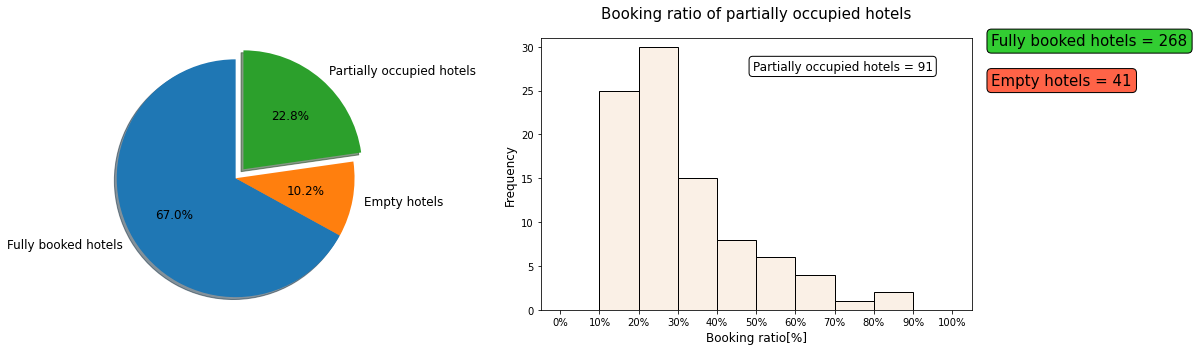

In [20]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(17,5)) #ax1,ax2 refer to your two pies
x = np.arange(0,1.1,0.1)
y,z,_ = ax1.hist(d.partially_vacant_hotels,bins = x,rwidth=1,align='mid', color='linen',ec = 'black')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax1.xaxis.set_ticks(x)
ax1.set_ylim([0,max(y)+1])
plt.text(0.95, max(y)*0.95, 'Partially occupied hotels = %s'%(d.number_not_full_empty_hotel), size=12, rotation=0.,ha="right", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="white"))
plt.text(1.1, max(y)*1.05, 'Fully booked hotels = %s'%(d.number_fully_book_hotels), size=15, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="limegreen"))
plt.text(1.1, max(y)*0.9, 'Empty hotels = %s'%(d.number_empty_hotels), size=15, rotation=0.,ha="left", va="top", bbox=dict(boxstyle="round",
                   ec="black", fc="tomato"))
plt.title('Booking ratio of partially occupied hotels',fontsize=15,y=1.05)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Booking ratio[%]',fontsize=12)

labels = 'Fully booked hotels', 'Empty hotels', 'Partially occupied hotels'
sizes = [d.number_fully_book_hotels, d.number_empty_hotels, len(d.partially_vacant_hotels)]
explode = (0, 0, 0.1)  # only "explode" the 3rd slice.
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig.savefig('pics/Booking_ratio_hotel_availabilty.png',bbox_inches='tight') 